<a href="https://colab.research.google.com/github/phaneo/TF2-Complete/blob/main/01_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Regression with neural networks using Tensorflow

In [ ]:
import tensorflow as tf

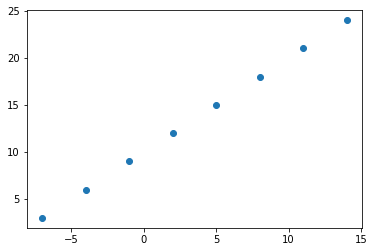

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24. ])

# Visualize the relation
plt.scatter(X, y)

# Input and output shapes

In [ ]:
# Create a demo tensor for housing price prediction problem

house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

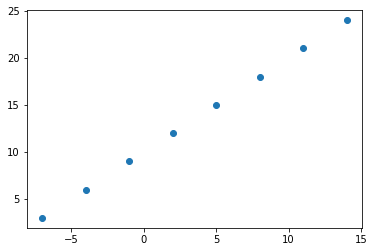

In [ ]:
plt.scatter(X, y)

## Steps in modelling with tensorflow

1. **Creating the model** - define input & output layers, along with hidden layers
2. **Compile the model** - define loss func, the optimizer, and evaluation metrics
3. **Fitting the model** - letting the model find the patterns between features & labels.

In [ ]:
tf.random.set_seed(42)

# 1. Create a model using Sequential API

model = tf.keras.Sequential([                                                      
                             tf.keras.layers.Dense(8, activation='relu'),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1)
])



# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
  

Epoch 1/100
1/1 [==============================] - 1s 746ms/step - loss: 12.6687 - mae: 12.6687
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4362 - mae: 11.4362
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0449 - mae: 10.0449
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9014 - mae: 8.9014
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5406 - mae: 7.5406
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 5.9191 - mae: 5.9191
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 4.1179 - mae: 4.1179
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 4.4481 - mae: 4.4481
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 5.2079 - mae: 5.2079
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 5.3255 - mae: 5.3255
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - l

In [ ]:
# Try and make a prediction
model.predict([17.])

array([[27.045898]], dtype=float32)

## Evaluating a model

In [ ]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

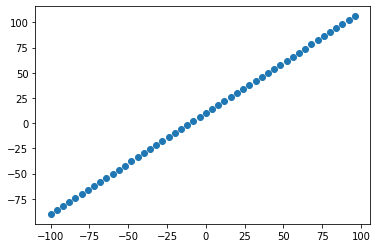

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [ ]:
len(X)

50

In [ ]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

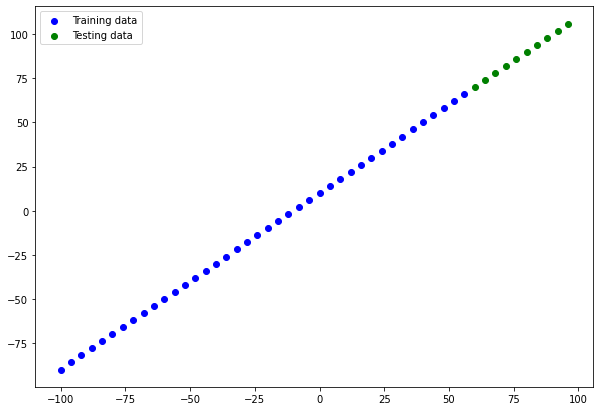

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 32)                288       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,481
Trainable params: 2,481
Non-trainable params: 0
_________________________________________________________________


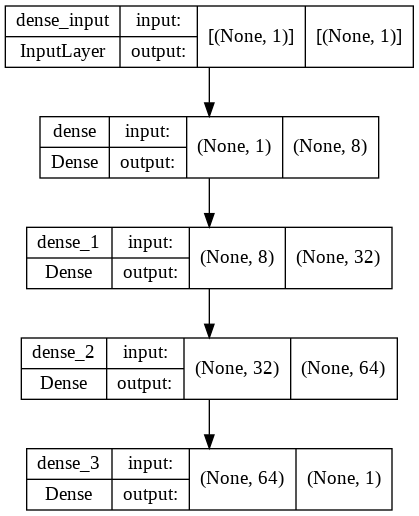

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[ 75.687996],
       [ 80.23837 ],
       [ 84.78881 ],
       [ 89.33924 ],
       [ 93.88967 ],
       [ 98.440094],
       [102.990524],
       [107.54096 ],
       [112.091385],
       [116.64182 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def plot_pred(train_data = X_train,
              train_labels = y_train,
              test_data = X_test,
              test_labels = y_test,
              predictions = y_pred):
  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, train_labels, c='b', label='Training Data')
  plt.scatter(test_data, test_labels, c='g', label='Testing Data')
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  plt.legend()
  plt.show()

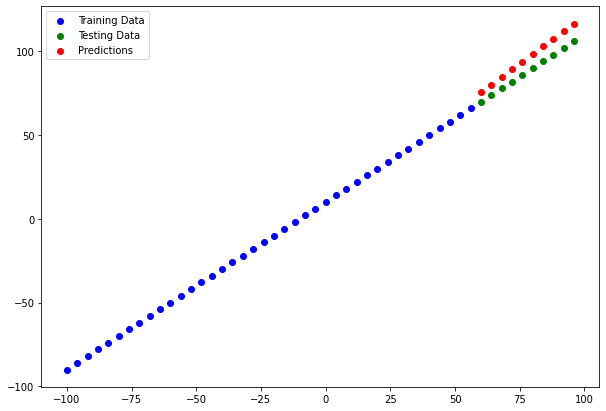

In [ ]:
plot_pred()

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=8.164888>

In [ ]:
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=69.1649>

In [ ]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))
  

# Running experiments to improve our model

1. Get more data
2. Make the model larger
3. Train for longer

In [ ]:
# Build model_1

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

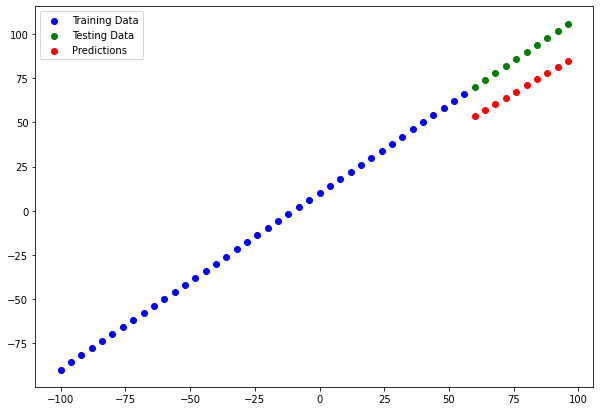

In [ ]:
# Make and plot predictions for model_1

y_preds_1 = model_1.predict(X_test)
plot_pred(predictions=y_preds_1)

In [ ]:
# Evaluate model_1
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [ ]:
# Build Model_2

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 23ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [========================

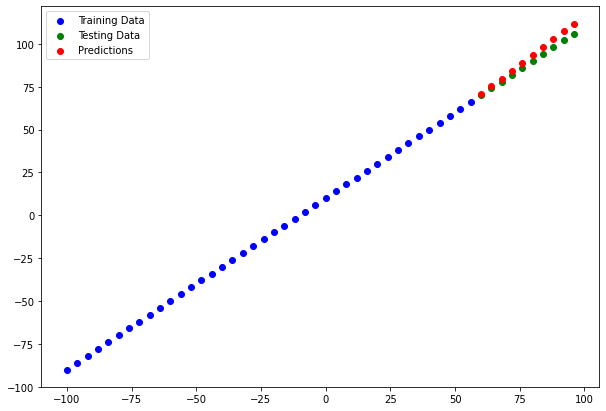

In [ ]:
# Make predictions for model_2

y_preds_2 = model_2.predict(X_test)
plot_pred(predictions=y_preds_2)

In [ ]:
# Evaluate model_3
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

In [ ]:
# Model 3

# Build the model

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 10ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/500
2/2 [==============================] - 0s 17ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/500
2/2 [=====================

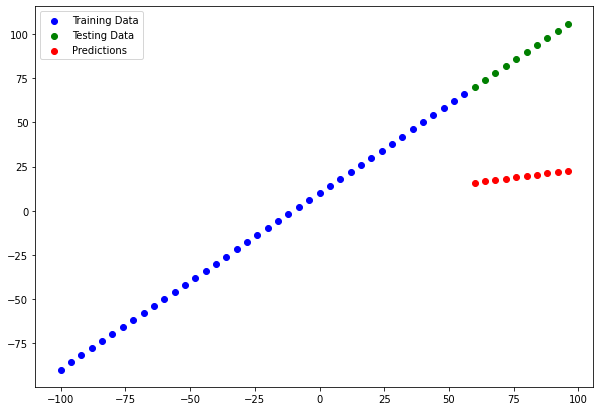

In [ ]:
# Making & plotting predictions
y_preds_3 = model_3.predict(X_test)
plot_pred(predictions=y_preds_3)

In [ ]:
# Evaluate model_3
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

# Comparing the results of our experiments

In [ ]:
# Let's create a pandas dataframe

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["Model", "mae", "mse"])
all_results

,Model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Saving a model

In [ ]:
model_2.save('best_model_regression.h5')

# Loading a model

In [ ]:
loaded_savemodel = tf.keras.models.load_model("best_model_regression.h5")
loaded_savemodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_savemodel_preds = loaded_savemodel.predict(X_test)
model_2_preds == loaded_savemodel_preds                                                  

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A larger example

In [ ]:
# Read insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
pd.get_dummies(insurance)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
X = insurance_one_hot.drop(labels="charges", axis=1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
y = insurance_one_hot["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [ ]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 5ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/500
34/34 [==============================] - 0s 5ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/500
34/34 [==============================] - 0s 5ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/500
34/34 [==============================] - 0s 6ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/500
34/34 [==============================] - 0s 7ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/500
34/34 [==============================] - 0s 6ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/500
34/34 [==============================] - 0s 5ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4540.6558 - mae: 4540.6558


[4540.65576171875, 4540.65576171875]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

# Revise the model

In [ ]:
tf.random.set_seed(42)

ins_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

ins_model_2.compile(loss = tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics=["mae"])

history = ins_model_2.fit(X_train, y_train, epochs=400)

Epoch 1/400
34/34 [==============================] - 0s 3ms/step - loss: 13321.5840 - mae: 13321.5840
Epoch 2/400
34/34 [==============================] - 0s 2ms/step - loss: 13223.3330 - mae: 13223.3330
Epoch 3/400
34/34 [==============================] - 0s 2ms/step - loss: 12998.6709 - mae: 12998.6709
Epoch 4/400
34/34 [==============================] - 0s 2ms/step - loss: 12518.9355 - mae: 12518.9355
Epoch 5/400
34/34 [==============================] - 0s 2ms/step - loss: 11636.5439 - mae: 11636.5439
Epoch 6/400
34/34 [==============================] - 0s 2ms/step - loss: 10323.1084 - mae: 10323.1084
Epoch 7/400
34/34 [==============================] - 0s 2ms/step - loss: 8868.9893 - mae: 8868.9893
Epoch 8/400
34/34 [==============================] - 0s 2ms/step - loss: 7824.9985 - mae: 7824.9985
Epoch 9/400
34/34 [==============================] - 0s 2ms/step - loss: 7514.4321 - mae: 7514.4321
Epoch 10/400
34/34 [==============================] - 0s 2ms/step - loss: 7477.0400 - ma

In [ ]:
ins_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3163.4924 - mae: 3163.4924


[3163.492431640625, 3163.492431640625]

Text(0.5, 0, 'epochs')

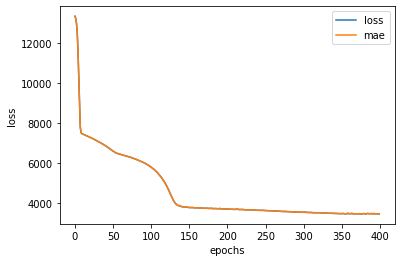

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing data (normalization & standardization)

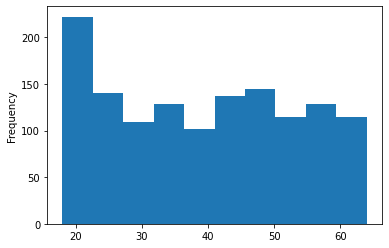

In [ ]:
X["age"].plot(kind="hist")

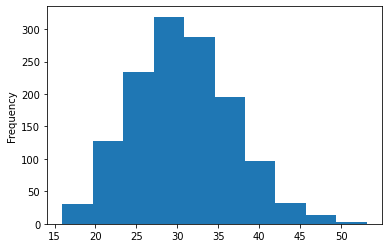

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# Build a NN model to fit our normalized data

tf.random.set_seed(42)

ins_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

ins_model_4.compile(loss = tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["mae"]
                    )

ins_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [ ]:
ins_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.5771 - mae: 3171.5771


[3171.5771484375, 3171.5771484375]

# Exercises

In [ ]:
tf.random.set_seed(42)

ins_model_ex3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(1)
])

ins_model_ex3.compile(loss = tf.keras.losses.mae,
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ["mae"]
)

ins_model_ex3.fit(X_train_normal, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 5ms/step - loss: 13315.8877 - mae: 13315.8877
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 12711.9844 - mae: 12711.9844
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 9599.5137 - mae: 9599.5137
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 7793.8750 - mae: 7793.8750
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 7452.3950 - mae: 7452.3950
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 7086.4409 - mae: 7086.4409
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 6583.3940 - mae: 6583.3940
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 5865.2573 - mae: 5865.2573
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 4862.1289 - mae: 4862.1289
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 3998.0051 - mae: 3998.

In [ ]:
ins_model_ex3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3168.5181 - mae: 3168.5181


[3168.51806640625, 3168.51806640625]

In [ ]:
tf.random.set_seed(42)

ins_model_ex4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])


ins_model_ex4.compile(loss = tf.keras.losses.mae,
                      optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                      metrics = ["mae"]
                      )

ins_model_ex4.fit(X_train_normal, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 3ms/step - loss: 13345.8555 - mae: 13345.8555
Epoch 2/300
34/34 [==============================] - 0s 4ms/step - loss: 13345.1680 - mae: 13345.1680
Epoch 3/300
34/34 [==============================] - 0s 6ms/step - loss: 13344.3037 - mae: 13344.3037
Epoch 4/300
34/34 [==============================] - 0s 6ms/step - loss: 13343.1387 - mae: 13343.1387
Epoch 5/300
34/34 [==============================] - 0s 6ms/step - loss: 13341.5117 - mae: 13341.5117
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 13339.2295 - mae: 13339.2295
Epoch 7/300
34/34 [==============================] - 0s 5ms/step - loss: 13336.0332 - mae: 13336.0332
Epoch 8/300
34/34 [==============================] - 0s 6ms/step - loss: 13331.5986 - mae: 13331.5986
Epoch 9/300
34/34 [==============================] - 0s 4ms/step - loss: 13325.5762 - mae: 13325.5762
Epoch 10/300
34/34 [==============================] - 0s 5ms/step - loss: 13317.56

In [ ]:
ins_model_ex4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3452.0461 - mae: 3452.0461


[3452.046142578125, 3452.046142578125]

# Exercise - 4

### NN Regression on Boston housing dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=42
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
X_train[:5], y_train[:5]

(array([[9.17800e-02, 0.00000e+00, 4.05000e+00, 0.00000e+00, 5.10000e-01,
         6.41600e+00, 8.41000e+01, 2.64630e+00, 5.00000e+00, 2.96000e+02,
         1.66000e+01, 3.95500e+02, 9.04000e+00],
        [5.64400e-02, 4.00000e+01, 6.41000e+00, 1.00000e+00, 4.47000e-01,
         6.75800e+00, 3.29000e+01, 4.07760e+00, 4.00000e+00, 2.54000e+02,
         1.76000e+01, 3.96900e+02, 3.53000e+00],
        [1.05740e-01, 0.00000e+00, 2.77400e+01, 0.00000e+00, 6.09000e-01,
         5.98300e+00, 9.88000e+01, 1.86810e+00, 4.00000e+00, 7.11000e+02,
         2.01000e+01, 3.90110e+02, 1.80700e+01],
        [9.16400e-02, 0.00000e+00, 1.08100e+01, 0.00000e+00, 4.13000e-01,
         6.06500e+00, 7.80000e+00, 5.28730e+00, 4.00000e+00, 3.05000e+02,
         1.92000e+01, 3.90910e+02, 5.52000e+00],
        [5.09017e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
         6.29700e+00, 9.18000e+01, 2.36820e+00, 2.40000e+01, 6.66000e+02,
         2.02000e+01, 3.85090e+02, 1.72700e+01]]),
 array([23.6,

In [ ]:
tf.random.set_seed(42)

boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

boston_model.compile(loss = tf.keras.losses.mae,
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ["mae"]
                     )

history = boston_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 3ms/step - loss: 40.8616 - mae: 40.8616
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 18.9704 - mae: 18.9704
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 13.3901 - mae: 13.3901
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 11.0942 - mae: 11.0942
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 9.3926 - mae: 9.3926
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 8.8683 - mae: 8.8683
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 8.2490 - mae: 8.2490
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 8.1339 - mae: 8.1339
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 7.2046 - mae: 7.2046
Epoch 10/200
13/13 [==============================] - 0s 4ms/step - loss: 7.3050 - mae: 7.3050
Epoch 11/200
13/13 [==============================]

In [ ]:
boston_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 4.6654 - mae: 4.6654


[4.665430068969727, 4.665430068969727]

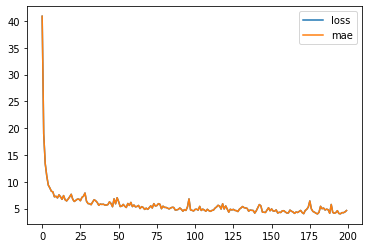

In [ ]:
pd.DataFrame(history.history).plot()